In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../../data/quarterly_data.csv", encoding = 'unicode_escape')

In [2]:
df1 = df.replace("..", np.nan)

In [3]:
df2 = df1.iloc[:, 2:].apply(pd.to_numeric).interpolate(axis=1)

In [4]:
df3 = pd.concat([df1.iloc[:, :2], df2], axis=1)

In [5]:
df4 = df3.dropna(thresh=len(df.columns)*0.5)

In [6]:
df5 = df3.dropna(thresh=len(df.columns)*0.5)

In [66]:
df_use = df3.dropna(thresh=len(df.columns)*0.5)

In [7]:
df4 = df4.melt(id_vars=["Postal code", "Building type"],var_name="Quarter", value_name="EUR/m2")

In [8]:
### Regex to change quarters to datetime
import datetime as date

def quarter_to_datetime(row):
    dates = {"Q1": "1/1", "Q2":"4/1", "Q3":"7/1", "Q4":"10/1"}
    string = row.replace("*", "").split(" ")[0]
    year, quarter = string[:4], string[4:]
    datetime_str = dates[quarter] + "/" + year
    return date.datetime.strptime(datetime_str, '%d/%m/%Y')
    
    
df4["Quarter"] = df4["Quarter"].apply(lambda row: quarter_to_datetime(row))
df4

,Postal code,Building type,Quarter,EUR/m2
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",2010-01-01,5458.0
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",2010-01-01,5164.0
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",2010-01-01,4944.0
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,2010-01-01,5168.0
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Building types total,2010-01-01,5168.0
5,00120 Punavuori (Helsinki ),"Blocks of flats, one-room flat",2010-01-01,5515.0
6,00120 Punavuori (Helsinki ),"Blocks of flats, two-room flat",2010-01-01,5349.0
7,00120 Punavuori (Helsinki ),"Blocks of flats, three-room flat+",2010-01-01,6236.0
8,00120 Punavuori (Helsinki ),Blocks of flats total,2010-01-01,5618.0
9,00120 Punavuori (Helsinki ),Building types total,2010-01-01,5618.0


In [9]:
### Split postal code and place

df4[['Postal code', 'Location']] = df4['Postal code'].str.split(' ', 1, expand=True)
df4

,Postal code,Building type,Quarter,EUR/m2,Location
0,00100,"Blocks of flats, one-room flat",2010-01-01,5458.0,Helsinki Keskusta - Etu-Töölö (Helsinki )
1,00100,"Blocks of flats, two-room flat",2010-01-01,5164.0,Helsinki Keskusta - Etu-Töölö (Helsinki )
2,00100,"Blocks of flats, three-room flat+",2010-01-01,4944.0,Helsinki Keskusta - Etu-Töölö (Helsinki )
3,00100,Blocks of flats total,2010-01-01,5168.0,Helsinki Keskusta - Etu-Töölö (Helsinki )
4,00100,Building types total,2010-01-01,5168.0,Helsinki Keskusta - Etu-Töölö (Helsinki )
5,00120,"Blocks of flats, one-room flat",2010-01-01,5515.0,Punavuori (Helsinki )
6,00120,"Blocks of flats, two-room flat",2010-01-01,5349.0,Punavuori (Helsinki )
7,00120,"Blocks of flats, three-room flat+",2010-01-01,6236.0,Punavuori (Helsinki )
8,00120,Blocks of flats total,2010-01-01,5618.0,Punavuori (Helsinki )
9,00120,Building types total,2010-01-01,5618.0,Punavuori (Helsinki )


In [10]:
import pgeocode
import time

In [11]:
"""def postal_code_to_geolocation(row):
    nomi = pgeocode.Nominatim('fi')
    location = nomi.query_postal_code(postal_code)
    return location.latitude, location.longitude"""

"def postal_code_to_geolocation(row):\n    nomi = pgeocode.Nominatim('fi')\n    location = nomi.query_postal_code(postal_code)\n    return location.latitude, location.longitude"

In [12]:
"""geolocation_dic = {}

latitude, longitude = postal_code_to_geolocation()
print(latitude)
geolocation_dic[p] = (latitude, longitude)
time.sleep(10)"""

'geolocation_dic = {}\n\nlatitude, longitude = postal_code_to_geolocation()\nprint(latitude)\ngeolocation_dic[p] = (latitude, longitude)\ntime.sleep(10)'

In [13]:
postal_code_list = list(df4["Postal code"].unique())
nomi = pgeocode.Nominatim('fi')
location = nomi.query_postal_code(postal_code_list)

In [14]:
###. WORK IN PROGRESS (93999 FOR KUUSAMO)
# THIS HAS TO BE ADDED MANUALLY

wanted_features_location = location[["postal_code", 
                                     "place_name", 
                                     "state_name", 
                                     "county_name", 
                                     "latitude", 
                                     "longitude"]]
wanted_features_location = wanted_features_location.rename(columns={"postal_code": "Postal code"})

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
 

## Clustering experiment

In [ ]:
df6 = df5.iloc[:, 2:-2]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df6)
sc = pd.DataFrame(scaled_features)
sc = sc.fillna(axis=1, method="bfill")

In [33]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [36]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    sse.append(kmeans.inertia_)

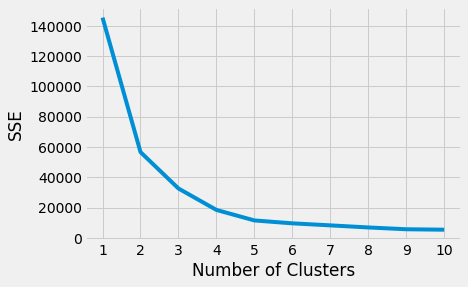

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [41]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    score = silhouette_score(sc, kmeans.labels_)
    silhouette_coefficients.append(score)

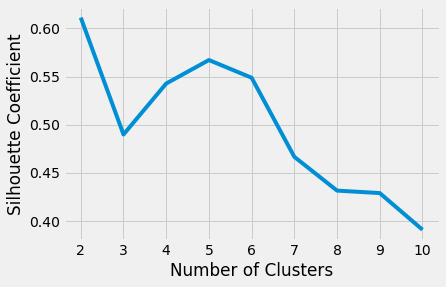

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Comparison of different algorithms

In [43]:
from sklearn.cluster import DBSCAN

In [48]:
from sklearn.cluster import AgglomerativeClustering

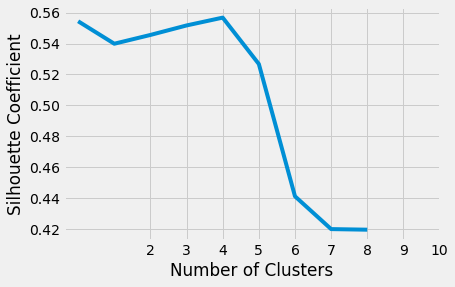

In [50]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11): 
    kmeans = AgglomerativeClustering(n_clusters=k)
    kmeans.fit(sc)
    score = silhouette_score(sc, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.xticks(range(2, 11))

plt.ylabel("Silhouette Coefficient")
plt.show()

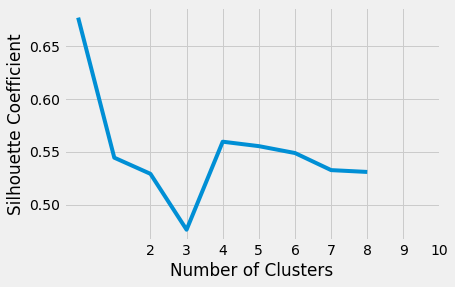

In [53]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11): 
    kmeans = AgglomerativeClustering(n_clusters=k, linkage="complete")
    kmeans.fit(sc)
    score = silhouette_score(sc, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.xticks(range(2, 11))

plt.ylabel("Silhouette Coefficient")
plt.show()

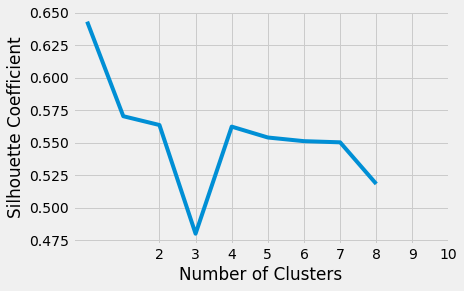

In [54]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11): 
    kmeans = AgglomerativeClustering(n_clusters=k, linkage="average")
    kmeans.fit(sc)
    score = silhouette_score(sc, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.xticks(range(2, 11))

plt.ylabel("Silhouette Coefficient")
plt.show()

In [62]:
db = DBSCAN(eps=0.3)
db.fit(sc)
silhouette_score(sc, db.labels_)

-0.44816904426669846

In [63]:
from sklearn.cluster import SpectralClustering

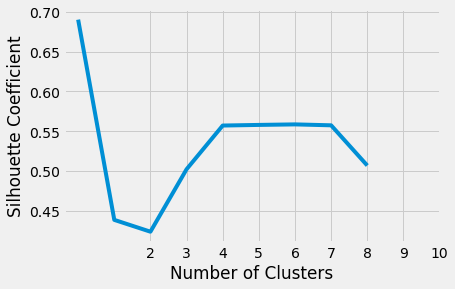

In [65]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11): 
    kmeans = SpectralClustering(n_clusters=k)
    kmeans.fit(sc)
    score = silhouette_score(sc, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.xticks(range(2, 11))

plt.ylabel("Silhouette Coefficient")
plt.show()

In [67]:
for k in [3,6,9]:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sc)
    col_name = "label" + str(k)
    df_use[col_name] = kmeans.labels_

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [69]:
df_use[['Postal code', 'Location']] = df_use['Postal code'].str.split(' ', 1, expand=True)
df_use = pd.merge(df_use, wanted_features_location, on="Postal code")

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


No handles with labels found to put in legend.


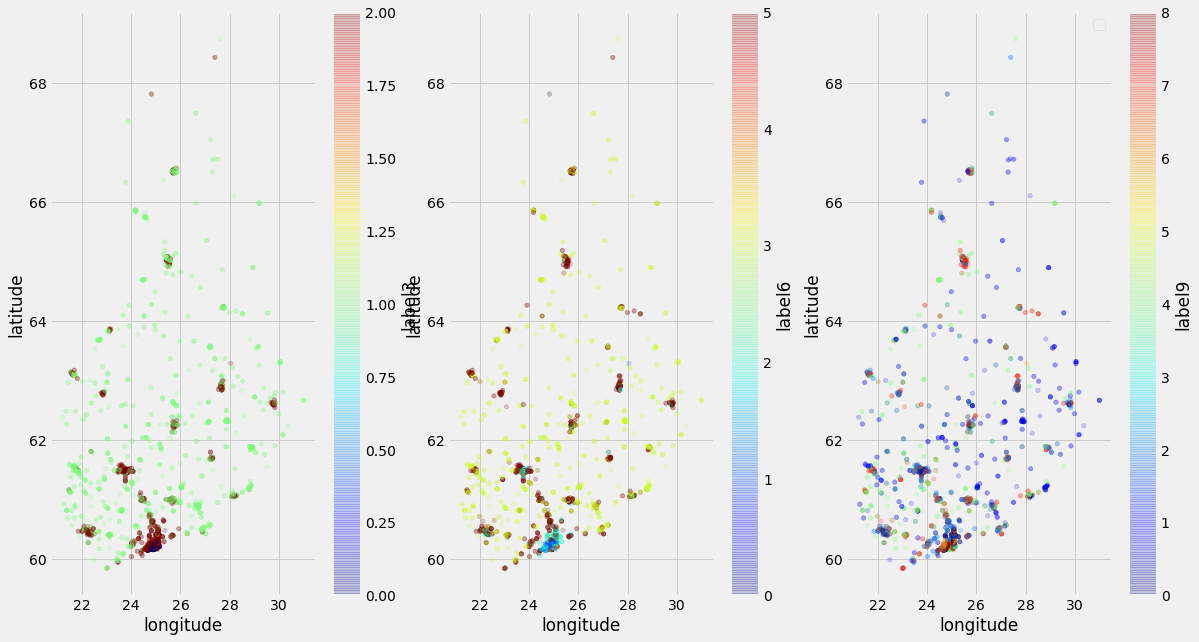

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))

df_use.plot(ax = ax1, kind="scatter", x="longitude", y="latitude", alpha=0.2,
 c="label3", cmap=plt.get_cmap("jet"), colorbar=True,
)
df_use.plot(ax = ax2, kind="scatter", x="longitude", y="latitude", alpha=0.2,
 c="label6", cmap=plt.get_cmap("jet"), colorbar=True,
)
df_use.plot(ax = ax3, kind="scatter", x="longitude", y="latitude", alpha=0.2,
 c="label9", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [21]:
sc["label"] = kmeans.labels_

In [22]:
df5["label"] = kmeans.labels_

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df5[['Postal code', 'Location']] = df5['Postal code'].str.split(' ', 1, expand=True)

/Users/taeyoungkee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [25]:
df6 = pd.merge(df5, wanted_features_location, on="Postal code")

No handles with labels found to put in legend.


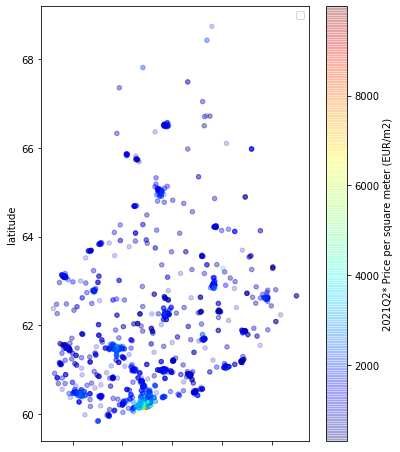

In [26]:
df6.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(6,8),
 c="2021Q2* Price per square meter (EUR/m2)", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

No handles with labels found to put in legend.


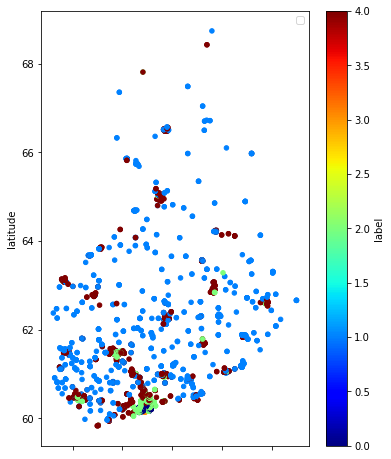

In [27]:
df6.plot(kind="scatter", x="longitude", y="latitude", alpha=1, figsize=(6,8),
 c="label", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Value of square meter of cities Q2 2021

In [74]:
Q2_2021__one_room = df_merge[(df_merge["Quarter"] == "2021-01-04") & (df_merge["Building type"] == "Blocks of flats, one-room flat")]


In [75]:
Q2_2021__one_room

,Postal code,Building type,Quarter,EUR/m2,Location,place_name,state_name,county_name,latitude,longitude
270,00100,"Blocks of flats, one-room flat",2021-01-04,8596.000000,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
546,00120,"Blocks of flats, one-room flat",2021-01-04,8549.699924,Punavuori (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1632,24.9391
822,00130,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Kaartinkaupunki (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1645,24.9487
1098,00140,"Blocks of flats, one-room flat",2021-01-04,10025.116718,Kaivopuisto - Ullanlinna (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1578,24.9525
1374,00150,"Blocks of flats, one-room flat",2021-01-04,9420.000000,Eira - Hernesaari (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1570,24.9369
...,...,...,...,...,...,...,...,...,...,...
462294,99830,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Saariselkä (Inari ),Saariselkä,Lapland,Pohjois-Lappi,68.4230,27.3965
462570,99870,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Inari Keskus-Lemmenjoki (Inari ),Inari,Lapland,Pohjois-Lappi,68.9287,26.9896
462846,99930,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Sevettijärvi-Näätämö (Inari ),Sevettijärvi,Lapland,Pohjois-Lappi,69.4918,28.5786
463122,99950,"Blocks of flats, one-room flat",2021-01-04,2290.004173,Karigasniemi (Utsjoki ),Karigasniemi,Lapland,Pohjois-Lappi,69.4729,25.9527


No handles with labels found to put in legend.


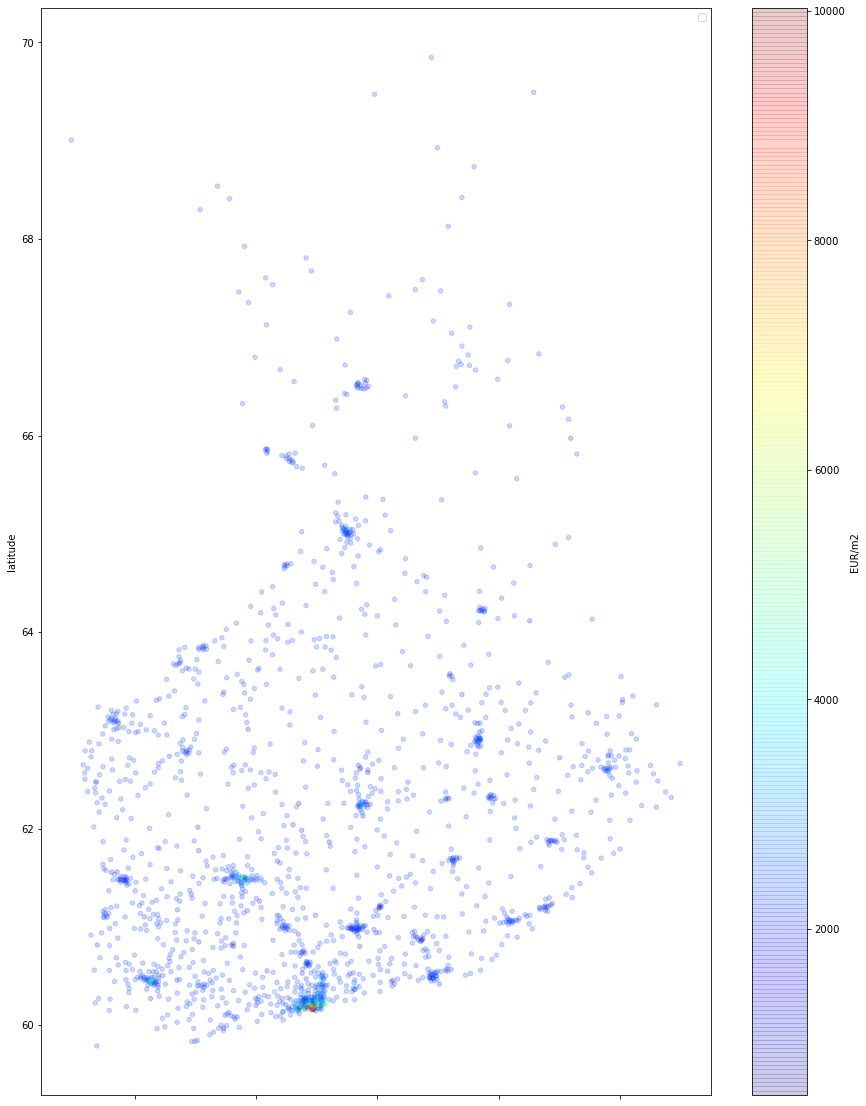

In [84]:
Q2_2021__one_room.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(15,20),
 c="EUR/m2", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()